# Hotel Booking Cancellations

This dataset consists of booking data from a city hotel and a resort hotel. It includes many details about the bookings, including room specifications, the length of stay, the time between the booking and the stay, whether the booking was canceled, and how the booking was made. The data was gathered between July 2015 and August 2017.

## Data Dictionary

_For binary variables: `1` = true and `0` = false._

| Column                                                                                 | Explanation                                                                                                                                                                       |
| -------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| is_canceled                                                                            | Binary variable indicating whether a booking was canceled                                                                                                                         |
| lead time                                                                              | Number of days between booking date and arrival date                                                                                                                              |
| arrival_date_week_number, arrival_date_day_of_month, arrival_date_month                | Week number, day date, and month number of arrival date                                                                                                                           |
| stays_in_weekend_nights, stays_in_week_nights                                          | Number of weekend nights (Saturday and Sunday) and weeknights (Monday to Friday) the customer booked                                                                              |
| adults, children, babies                                                               | Number of adults, children, babies booked for the stay                                                                                                                            | 
| is_repeated_guest                                                                      | Binary variable indicating whether the customer was a repeat guest                                                                                                                |                
| previous_cancellations                                                                 | Number of prior bookings that were canceled by the customer                                                                                                                       | 
| previous_bookings_not_canceled                                                         | Number of prior bookings that were not canceled by the customer                                                                                                                   |
| required_car_parking_spaces                                                            | Number of parking spaces requested by the customer                                                                                                                                |
| total_of_special_requests                                                              | Number of special requests made by the customer                                                                                                                                   |
| avg_daily_rate                                                                         | Average daily rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights                                                              |
| booked_by_company                                                                      | Binary variable indicating whether a company booked the booking                                                                                                                   |
| booked_by_agent                                                                        | Binary variable indicating whether an agent booked the booking                                                                                                                    | 
| hotel_City                                                                             | Binary variable indicating whether the booked hotel is a "City Hotel"                                                                                                             |
| hotel_Resort                                                                           | Binary variable indicating whether the booked hotel is a "Resort Hotel"                                                                                                           |
| meal_BB                                                                                | Binary variable indicating whether a bed & breakfast meal was booked                                                                                                              |
| meal_HB                                                                                | Binary variable indicating whether a half board meal was booked                                                                                                                   |
| meal_FB                                                                                | Binary variable indicating whether a full board meal was booked                                                                                                                   |
| meal_No_meal                                                                           | Binary variable indicating whether there was no meal package booked                                                                                                               |
| market_segment_Aviation, market_segment_Complementary, market_segment_Corporate, market_segment_Direct, market_segment_Groups, market_segment_Offline_TA_TO, market_segment_Online_TA, market_segment_Undefined | Indicates market segment designation with a value of `1`. "TA"= travel agent, "TO"= tour operators |
| distribution_channel_Corporate, distribution_channel_Direct, distribution_channel_GDS, distribution_channel_TA_TO, distribution_channel_Undefined | Indicates booking distribution channel with a value of `1`. "TA"= travel agent, "TO"= tour operators, "GDS" = Global Distribution System |
| reserved_room_type_A, reserved_room_type_B, reserved_room_type_C, reserved_room_type_D, reserved_room_type_E, reserved_room_type_F, reserved_room_type_G, reserved_room_type_H, reserved_room_type_L | Indicates code of room type reserved with a value of `1`. Code is presented instead of designation for anonymity reasons |
| deposit_type_No_Deposit                                                                | Binary variable indicating whether a deposit was made                                                                                                                             |
| deposit_type_Non_Refund                                                                | Binary variable indicating whether a deposit was made in the value of the total stay cost                                                                                         |
| deposit_type_Refundable                                                                | Binary variable indicating whether a deposit was made with a value under the total stay cost                                                                                      |
| customer_type_Contract                                                                 | Binary variable indicating whether the booking has an allotment or other type of contract associated to it                                                                        |
| customer_type_Group                                                                    | Binary variable indicating whether the booking is associated to a group                                                                                                           |
| customer_type_Transient                                                                | Binary variable indicating whether the booking is not part of a group or contract, and is not associated to other transient booking                                               |
| customer_type_Transient-Party                                                          | Binary variable indicating whether the booking is transient, but is associated to at least another transient booking                                                              |

[Source](https://www.kaggle.com/jessemostipak/hotel-booking-demand/) and [license](https://creativecommons.org/licenses/by/4.0/) of data. The data is originally from an article called [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191) by Nuno Antonio, Ana de Almeida, and Luis Nunes. It was cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md).

### **Introduction**

A chain of hotels has noticed that the cancellation rate has risen in the past few years. This often leads to rooms that are left unrented for multiple days at a time.

Hotel management is interested in developing a model to predict the likelihood that a customer will cancel their reservation. If successful, this could be used to optimize their booking service and anticipate when cancellations will occur.

### **Which family sizes are associated with the highest cancellations?**

First looking at the relationship between current bookings and family size, we see that a family size of 2 makes up the overwhelming majority of cancellations and that cancellations are clustered between 1 and 5 family sizes.

In [35]:
SELECT 
	(adults + children + babies) AS family_size,
	count(*) as num_cancellations,
FROM 'data/hotel_bookings_clean.csv'
WHERE is_canceled = 1
	AND (adults + children + babies) IS NOT NULL
GROUP BY family_size
ORDER BY num_cancellations DESC;

family_size,num_cancellations
<dbl>,<dbl>
2,32569
1,6555
3,3376
4,1646
5,34
26,5
27,2
20,2
12,1


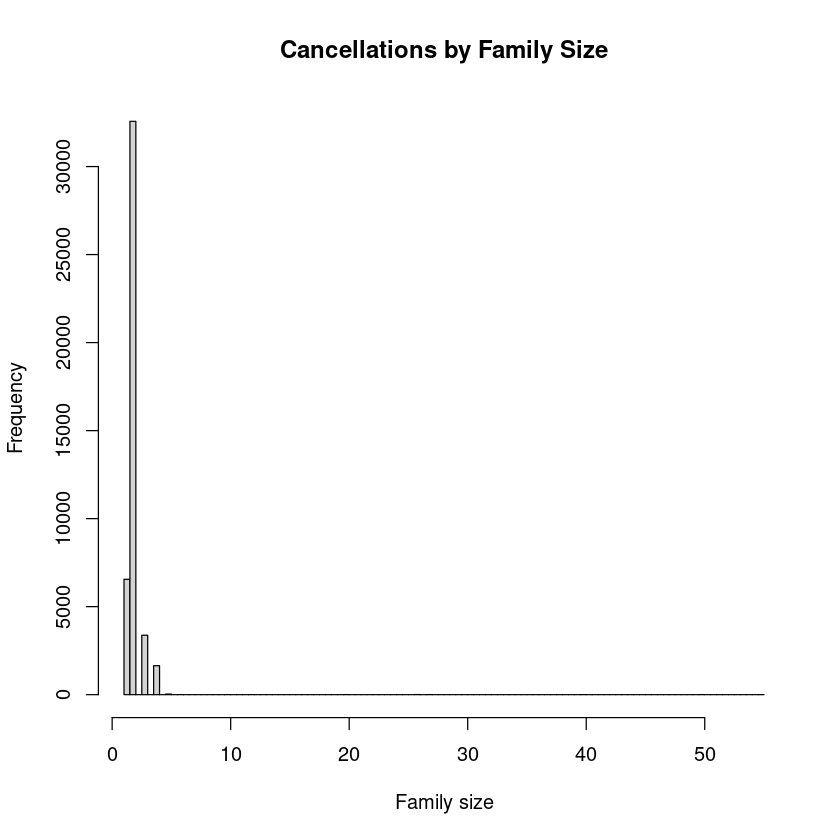

In [44]:
hist(fam_size$family_size, main = 'Cancellations by Family Size', xlab = 'Family size',
	 breaks = 100)

When looking at previous cancellations and family size, we also see that the highest numbers of previous cancellations are associated with family sizes of 2. 

In [31]:
SELECT
	(adults + children + babies) AS family_size,
	sum(previous_cancellations) AS sum_previous_cancellations
FROM 'data/hotel_bookings_clean.csv'
WHERE is_canceled = 1
GROUP BY family_size
ORDER BY sum_previous_cancellations DESC
LIMIT 5;

family_size,sum_previous_cancellations
<dbl>,<dbl>
2,8073
1,1049
3,60
4,29
5,1


### **Are longer lead times more likely to result in a cancellation?**

Lets categorize the lead times in the following fashion: _More than 1 year, Between 6 months and 1 year, Between 3 and 6 months, Between 1 and 3 months, Less than 1 month_

Grouping the data in this way shows that the majority of the cancellations are approximately evenly clustered between 1 month to 1 year lead times and that bookings with really long lead times (greater than 1 year) only make up a small percentage of cancellations. 

In [33]:
SELECT 
	CASE WHEN lead_time > 365 THEN 'More than 1 year'
	WHEN lead_time >= 180 AND lead_time <= 365 THEN 'Between 6 months and 1 year'
	WHEN lead_time >= 90 AND lead_time <= 180 THEN 'Between 3 and 6 months'
	WHEN lead_time >= 30 AND lead_time <= 90 THEN 'Between 1 and 3 months'
	ELSE 'Less than 1 month' END AS lead_times,
	count(*) AS num_cancellations
FROM 'data/hotel_bookings_clean.csv'
WHERE is_canceled = 1
GROUP BY lead_times, is_canceled
ORDER BY lead_times DESC
;


lead_times,num_cancellations
<chr>,<dbl>
More than 1 year,2129
Less than 1 month,6925
Between 6 months and 1 year,12053
Between 3 and 6 months,11787
Between 1 and 3 months,11305


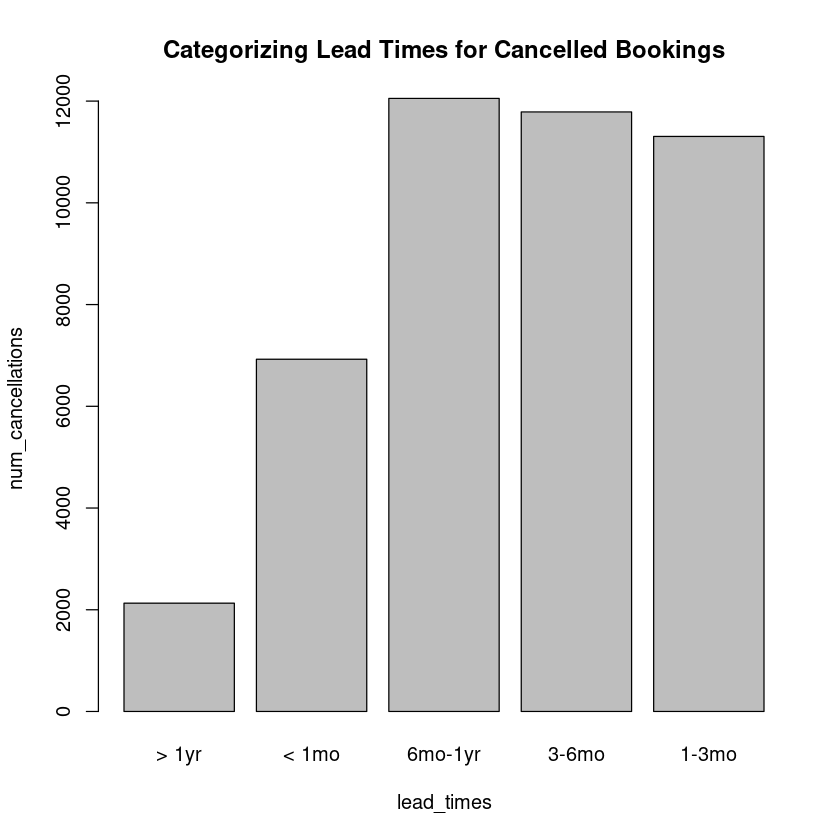

In [66]:
barplot(height = df4$num_cancellations, 
		names.arg = c('> 1yr', '< 1mo', '6mo-1yr', '3-6mo', '1-3mo'), xlab = 'lead_times', 
		ylab = 'num_cancellations', main = 'Categorizing Lead Times for Cancelled Bookings')

In [58]:
SELECT 
	lead_time 
FROM 'data/hotel_bookings_clean.csv'
WHERE is_canceled = 1

lead_time
<dbl>
85
75
23
60
96
45
40
43
45


Creating a boxplot of the lead times for cancelled bookings shows that the middle 50% of the available data has cancelled bookings between 49 and 214 days and a median of 113 days.

In [53]:
summary(lead_timing$lead_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    49.0   113.0   144.9   214.0   629.0 

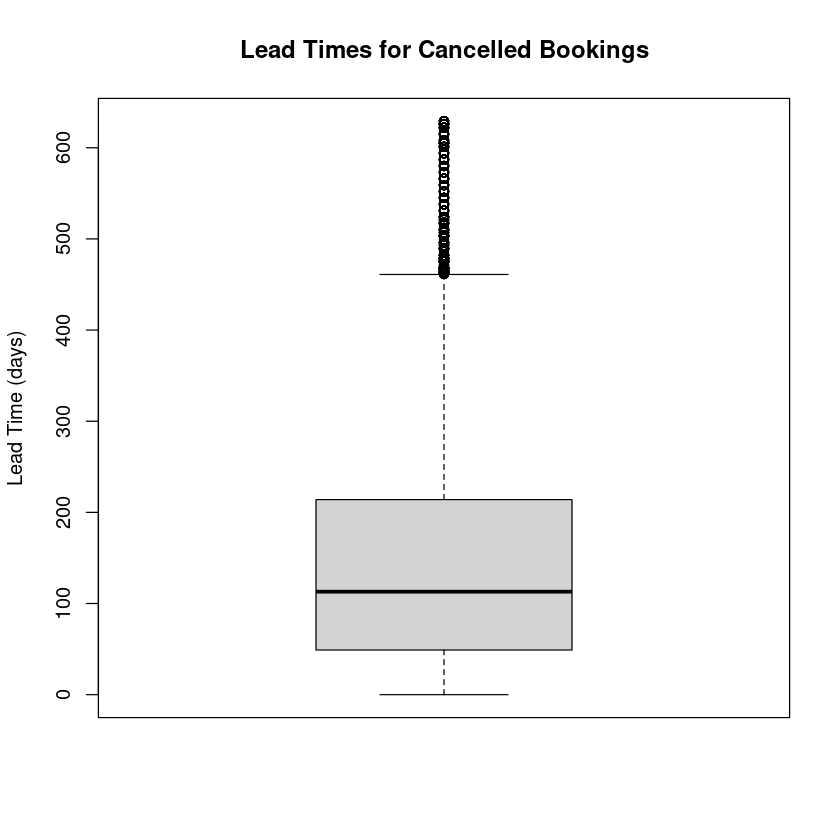

In [59]:
boxplot(lead_timing$lead_time, ylab = 'Lead Time (days)', main = 'Lead Times for Cancelled Bookings')

Displaying the lead time data in a histogram better shows the distribution versus the previous barplot. It shows that the data is right-skewed with less frequency of cancellations associated with longer lead times. 

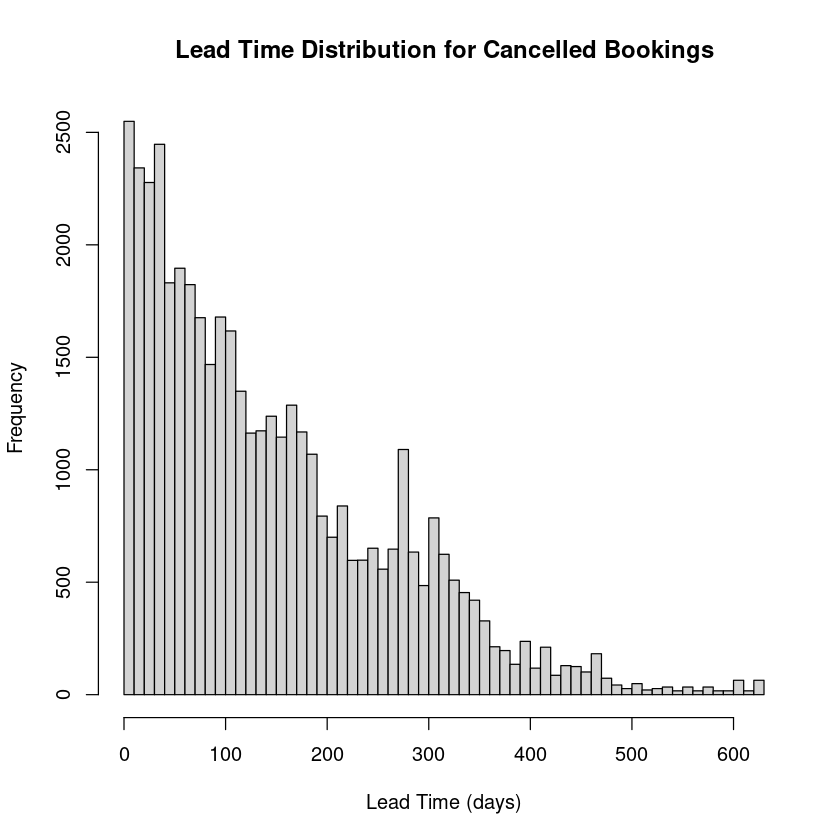

In [61]:
hist(lead_timing$lead_time, breaks = 50, xlab = 'Lead Time (days)', main = 'Lead Time Distribution for Cancelled Bookings')

However, when overlaying the non-cancelled bookings data, the histogram shows that non-cancelled bookings also follows the same trend! In fact, the non-cancelled bookings comprise the majority of bookings for shorter lead times. However, around about ~250 days, the cancelled bookings start to make up a larger portion of the bookings. This overlayed histogram shows us that longer lead times are correlated with higher cancellations.

Installing ggplot2 [3.4.2] ...
	OK [linked cache]


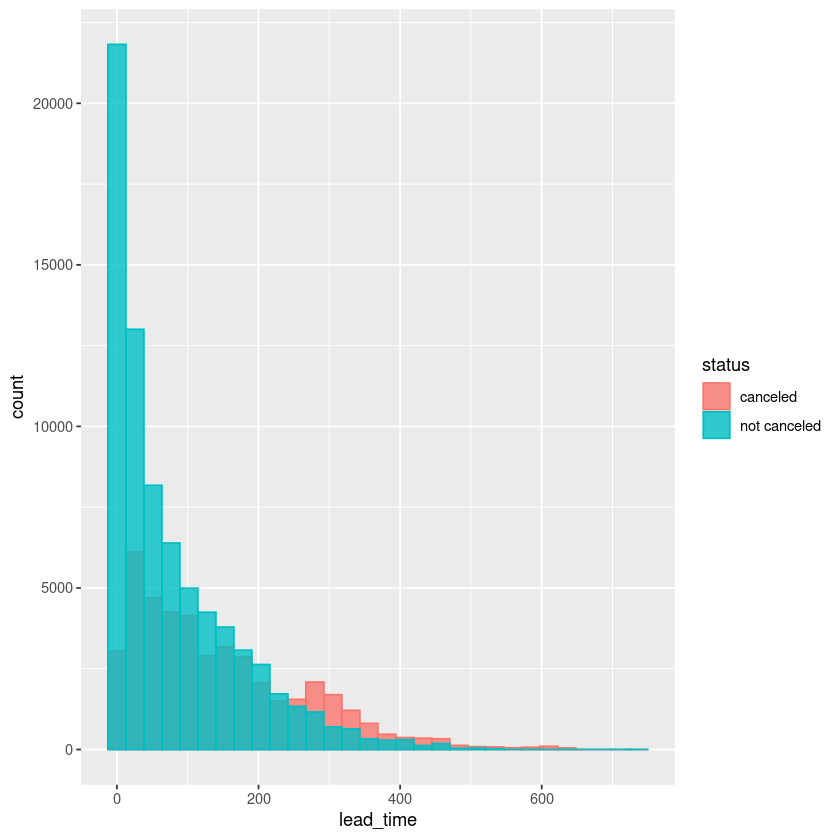

In [48]:
install.packages("ggplot2")
library(ggplot2)
ggplot(bookings, aes(x=lead_time, fill = status, color=status)) +
  geom_histogram(alpha = 0.80, position = "identity", bins = 30)

### **What months are cancellations rates more likely to happen?**

Querying the counts of the booking months throughout the year, we see that the lowest cancellations occur in January, February, and March, then November and December.

In [16]:
SELECT 
	arrival_date_month,
	count(*) AS count
FROM 'data/hotel_bookings_clean.csv'
WHERE is_canceled = 1
GROUP BY arrival_date_month
ORDER BY arrival_date_month;

arrival_date_month,count
<dbl>,<dbl>
1,1806
2,2693
3,3148
4,4518
5,4677
6,4534
7,4737
8,5237
9,4115


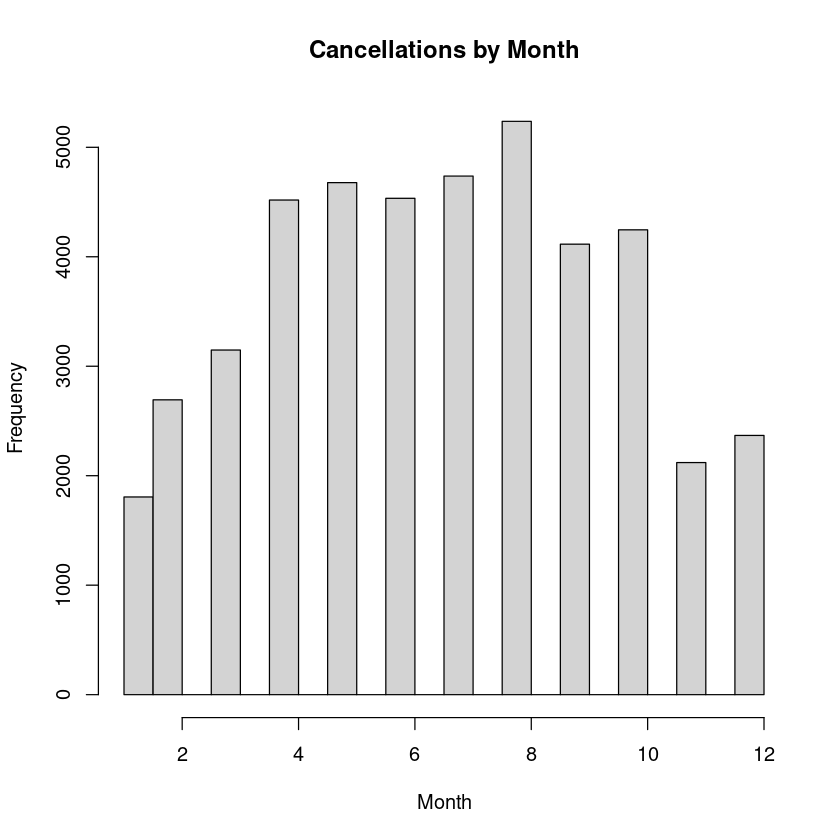

In [39]:
hist(months$arrival_date_month, main = 'Cancellations by Month', xlab = 'Month')

## **Conclusion**

In this initial analysis, we have generated a few inferences that will better inform hotel management:

1. Bookings with 2 people have historically produced the greatest numbers of cancellations
2. Bookings booked a very long time in advance correlate to a higher chance of cancellations
3. Cancellations seem to occur the most for bookings in April through October

Hotel management should consider incentives such as discounts for booking far in advance, for couples, and for booking in the April to October time range.